<a href="https://colab.research.google.com/github/sK-zA/Fowl-escapades-competition/blob/master/fowl_escapdes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import  Data**

In [2]:
!pip install kaggle 

**kaggle.json is your API from kaggle , this video show how to import data from Kaggle to Colab**

video Link : https://www.youtube.com/watch?v=eEgZtNOCJhk

**the data was too large so i demande to someone to upload this  data on Kaggl**e 

Data URL : https://www.kaggle.com/neyru1998/fowl-escapades

In [3]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"azerksouri","key":"5a0b3ae882c20c5d1b139437a3f7867f"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d neyru1998/fowl-escapades

100% 2.00G/2.01G [00:21<00:00, 70.8MB/s]
100% 2.01G/2.01G [00:21<00:00, 99.1MB/s]


In [6]:
!unzip "fowl-escapades.zip" 

Archive:  fowl-escapades.zip
  inflating: SampleSubmission (1).csv  
  inflating: StarterNotebook.ipynb   
  inflating: Test (1).csv            
  inflating: Test/Test/019OYB.mp3    
  inflating: Test/Test/01S9OX.mp3    
  inflating: Test/Test/02CS12.mp3    
  inflating: Test/Test/02LM3W.mp3    
  inflating: Test/Test/0C3A2V.mp3    
  inflating: Test/Test/0D4A65.mp3    
  inflating: Test/Test/0DK4NW.mp3    
  inflating: Test/Test/0E1YTK.mp3    
  inflating: Test/Test/0E6W1B.mp3    
  inflating: Test/Test/0EGKE8.mp3    
  inflating: Test/Test/0F0R5P.mp3    
  inflating: Test/Test/0F7P79.mp3    
  inflating: Test/Test/0GFISU.mp3    
  inflating: Test/Test/0KBFO1.mp3    
  inflating: Test/Test/0MRJFE.mp3    
  inflating: Test/Test/0OGRDO.mp3    
  inflating: Test/Test/0OJ5GD.mp3    
  inflating: Test/Test/0PQJMX.mp3    
  inflating: Test/Test/0TMRCG.mp3    
  inflating: Test/Test/0V4W7T.mp3    
  inflating: Test/Test/0VCD6A.mp3    
  inflating: Test/Test/0XDTVX.mp3    
  inflating: Test/T

# **Install some util Library**

In [0]:
%%capture
!apt-get install libav-tools -y

In [9]:
!pip install mutagen

     |████████████████████████████████| 215kB 16.4MB/s 


In [10]:
!pip install noisereduce 

  Created wheel for noisereduce: filename=noisereduce-1.1.0-cp36-none-any.whl size=7608 sha256=ce14e45f4c7f13bb0beac6f8fd99d9b01ad143fc3014876e8d90acfc4e812819
  Stored in directory: /root/.cache/pip/wheels/a6/2c/70/f9ccb41280dcfbe3eaeb7930f913dd85394617f3d3136f29cc
Successfully built noisereduce


In [11]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Keras
import keras
from keras import models
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
import librosa, librosa.display, IPython.display as ipd
import numpy as np
import json
from mutagen.mp3 import MP3
from statistics import mean, median
import noisereduce as nr
import sklearn
import contextlib
import wave
from scipy.io import wavfile
import os
import pandas as pd

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/noisereduce/noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## ***If you import my Data PLEASE MAKE SURE THAT YOU RENAME THE CSV FILES *** 
1.   Train (1).csv to Train.csv
2.   Test (1).csv to Test.csv
3.   SampleSubmission (1).csv to SampleSubmission.csv








In [12]:
train = pd.read_csv('Train.csv')
train.head(3)

,ID,common_name
0,MBMG2C,Ring-necked Dove
1,K8LJSB,Ring-necked Dove
2,OGD9L6,Ring-necked Dove


In [13]:
sub = pd.read_csv('SampleSubmission.csv')
sub.head(3)

,ID,Ring-necked Dove,Black Cuckoo,Red-chested Cuckoo,Fiery-necked Nightjar,Green Wood Hoopoe,Crested Barbet,Cape Batis,Olive Bushshrike,Orange-breasted Bushshrike,Bokmakierie,Black-backed Puffback,Southern Boubou,Black-headed Oriole,Fork-tailed Drongo,African Paradise Flycatcher,Sabota Lark,Eastern Clapper Lark,Rufous-naped Lark,Dark-capped Bulbul,Sombre Greenbul,Long-billed Crombec,African Reed Warbler,Rattling Cisticola,Levaillants Cisticola,Tawny-flanked Prinia,Karoo Prinia,Bar-throated Apalis,Green-backed Camaroptera,Chestnut-vented Warbler,Cape White-eye,Karoo Scrub Robin,White-browed Scrub Robin,Cape Robin-Chat,White-browed Robin-Chat,Chorister Robin-Chat,Southern Double-collared Sunbird,White-bellied Sunbird,African Pipit,African Rock Pipit,Cape Bunting
0,019OYB,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,01S9OX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,02CS12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# This list will be useful later
birds = sub.columns[1:]
birds

Index(['Ring-necked Dove', 'Black Cuckoo', 'Red-chested Cuckoo',
       'Fiery-necked Nightjar', 'Green Wood Hoopoe', 'Crested Barbet',
       'Cape Batis', 'Olive Bushshrike', 'Orange-breasted Bushshrike',
       'Bokmakierie', 'Black-backed Puffback', 'Southern Boubou',
       'Black-headed Oriole', 'Fork-tailed Drongo',
       'African Paradise Flycatcher', 'Sabota Lark', 'Eastern Clapper Lark',
       'Rufous-naped Lark', 'Dark-capped Bulbul', 'Sombre Greenbul',
       'Long-billed Crombec', 'African Reed Warbler', 'Rattling Cisticola',
       'Levaillants Cisticola', 'Tawny-flanked Prinia', 'Karoo Prinia',
       'Bar-throated Apalis', 'Green-backed Camaroptera',
       'Chestnut-vented Warbler', 'Cape White-eye', 'Karoo Scrub Robin',
       'White-browed Scrub Robin', 'Cape Robin-Chat',
       'White-browed Robin-Chat', 'Chorister Robin-Chat',
       'Southern Double-collared Sunbird', 'White-bellied Sunbird',
       'African Pipit', 'African Rock Pipit', 'Cape Bunting'],
      d

In [15]:
# Add file names
train['file_name'] = 'Train/Train/'+train['ID']+'.mp3'
sub['file_name'] = 'Test/Test/'+sub['ID']+'.mp3'
train.head(2)

,ID,common_name,file_name
0,MBMG2C,Ring-necked Dove,Train/Train/MBMG2C.mp3
1,K8LJSB,Ring-necked Dove,Train/Train/K8LJSB.mp3


# **Some Visualisation**

In [0]:
N_FFT = 1024         # Number of frequency bins for Fast Fourier Transform
HOP_SIZE = 1024      # Number of audio frames between STFT columns
SR = 44100           # Sampling frequency
N_MELS = 40          # Mel band parameters   
WIN_SIZE = 1024      # number of samples in each STFT window
WINDOW_TYPE = 'hann' # the windowin function
FEATURE = 'mel' 
FMIN = 0

/usr/local/lib/python3.6/dist-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


Train/Train/MBMG2C.png


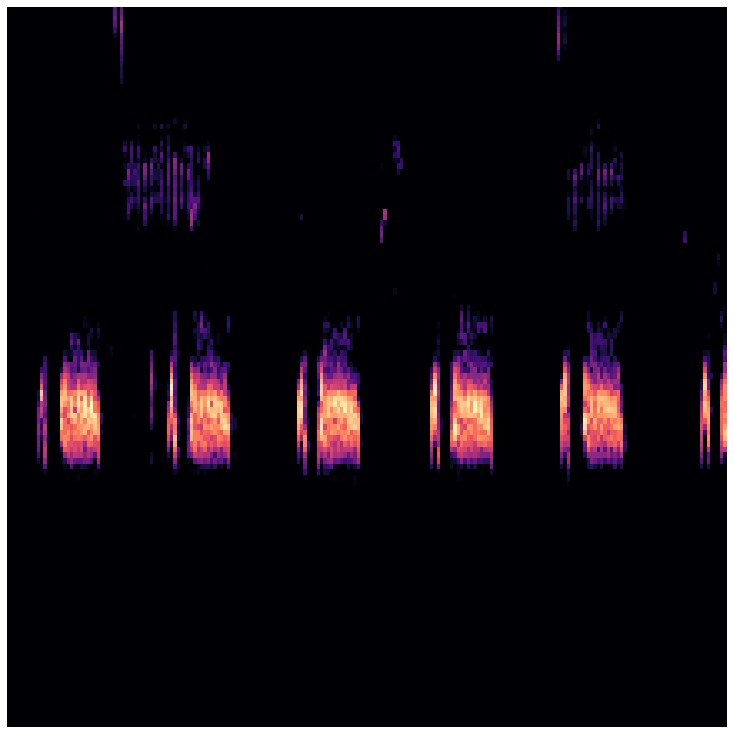

In [17]:
# Going from a sound to an image: spectrograms

def gen_spectrogram(path):
  bird , sr = librosa.load(path,duration=10)
  D_bird = librosa.stft(bird, n_fft = N_FFT, 
                      hop_length = HOP_SIZE, 
                      window = WINDOW_TYPE, 
                      win_length = WIN_SIZE)
  
  stft_bird = np.abs(D_bird)**2
  S = librosa.feature.melspectrogram(y=None, 
                                              S=stft_bird, 
                                              sr=SR, 
                                              n_fft=N_FFT, 
                                              hop_length=HOP_SIZE, 
                                              n_mels=N_MELS, 
                                              htk=True, 
                                              fmin=0.0, 
                                              fmax=sr/2.0)

  
                         
  
  fig = plt.figure(frameon=False)
  fig.set_size_inches(10, 10)
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')

  fig.savefig(path[:-4]+'.png', dpi=512//8)
  print(path[:-4]+'.png')

gen_spectrogram('Train/Train/MBMG2C.mp3')

In [18]:
import gc 
gc.collect()

21417

In [19]:
# This takes a long time to run, and you might have to do it in batches. Save the spectrogras for future runs!
import numpy as np
import os

for i, pth in enumerate(train['file_name'].values):
  print(i*100//(len(sub)+len(train)), '% done')
  # Check if we've already generated a spectrogram, and if not, make one
  if not os.path.isfile(pth[:-4]+'.png'):
    plt.clf()
    gen_spectrogram(pth)
  ipd.clear_output(wait=True)
  plt.close()

<Figure size 432x288 with 0 Axes>

In [20]:
import gc
gc.collect()

2953032

In [21]:
# Checking that the spectrograms were generated successfully:
import glob
ims = glob.glob('Train/Train/*.png')
print(len(ims), len(train))

1857 1857


In [22]:
# If you stopped the process early and want to try with only a few spectrograms, this will only use the ones that have been generated
train['img_path'] = train['file_name'].str[:-4]+'.png'
train = train.loc[train.img_path.isin(ims)]
len(train)

1857

In [23]:
# This takes a long time to run, and you might have to do it in batches. Save the spectrogras for future runs!
import numpy as np
import os
for i, pth in enumerate(sub['file_name'].values):
  print(i*100//(len(sub)+len(train)), '% done')
  # Check if we've already generated a spectrogram, and if not, make one
  if not os.path.isfile(pth[:-4]+'.png'):
    plt.clf()
    gen_spectrogram(pth)
  ipd.clear_output(wait=True)
  plt.close()
  

<Figure size 432x288 with 0 Axes>

In [25]:
# Similarly, test now has rows for files that have had spectrograms created.
sub['img_path'] =  sub['file_name'].str[:-4]+'.png'
ims = glob.glob('Test/Test/*.png')
test = sub.loc[sub.img_path.isin(ims)]
print(len(sub), len(test))

911 911


In [26]:
gc.collect()

1449906

## **Modeling**

In [0]:
from fastai.vision import *

In [0]:
np.random.seed(42)

data = ImageDataBunch.from_df(path="", df=train[["img_path", "common_name"]], ds_tfms=get_transforms(), size=1280, num_workers=4,)\
  .split_by_rand_pct()\
  .label_from_df(cols='common_name')\
  .databunch(bs=16)\
  .normalize(imagenet_stats)

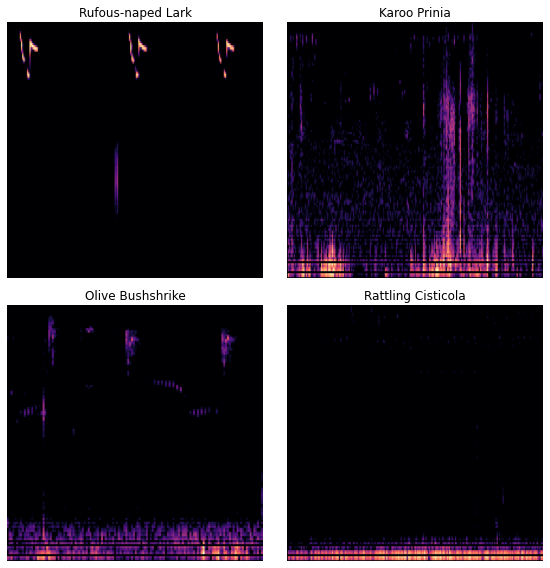

In [29]:
data.show_batch(rows=2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


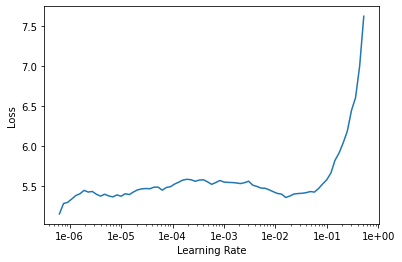

In [30]:
# Create a learner and pick a learning rate
learn = cnn_learner(data, models.resnet18, metrics=[error_rate, accuracy, top_k_accuracy])
learn.lr_find()
learn.recorder.plot()

In [31]:
# Train the head of the model
lr = 1e-2
learn.fit_one_cycle(15, lr)

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,4.782974,3.276800,0.828283,0.171717,0.454545,00:29
1,3.638245,3.234286,0.744108,0.255892,0.558923,00:28
2,3.256426,3.781833,0.723906,0.276094,0.538721,00:28
3,3.341794,3.540158,0.717172,0.282828,0.639731,00:28
4,3.181935,3.736710,0.747475,0.252525,0.599327,00:28
5,2.745168,2.626860,0.595960,0.404040,0.727273,00:28
6,2.167691,2.298347,0.558923,0.441077,0.747475,00:28
7,1.817401,2.056056,0.508417,0.491582,0.750842,00:28
8,1.581841,1.997952,0.488215,0.511784,0.781145,00:28
9,1.280120,1.782405,0.451178,0.548822,0.838384,00:28


epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


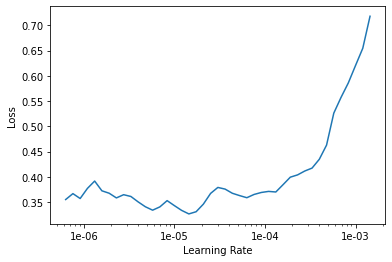

In [32]:
# Not doing very well yet. Let's train the inner layers
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [33]:
learn.fit_one_cycle(6, slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,0.345268,1.614617,0.397306,0.602694,0.851852,00:36
1,0.321023,1.604949,0.387205,0.612795,0.858586,00:36
2,0.332654,1.626671,0.387205,0.612795,0.858586,00:36
3,0.339569,1.601369,0.380471,0.619529,0.865320,00:36
4,0.313497,1.621609,0.387205,0.612795,0.865320,00:36
5,0.293656,1.593335,0.380471,0.619529,0.858586,00:37


epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


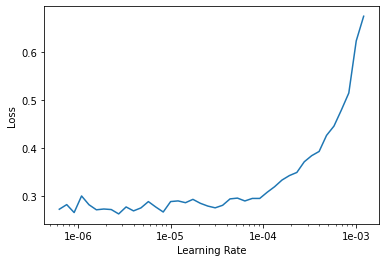

In [34]:
# Not doing very well yet. Let's train the inner layers
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(4, 1e-6 )

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,0.282413,1.609359,0.383838,0.616162,0.858586,00:36
1,0.311028,1.641309,0.390572,0.609428,0.851852,00:36
2,0.304135,1.601307,0.373737,0.626263,0.865320,00:36
3,0.293044,1.607566,0.380471,0.619529,0.868687,00:36


epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


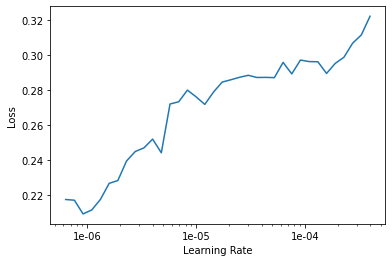

In [36]:
# Not doing very well yet. Let's train the inner layers
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

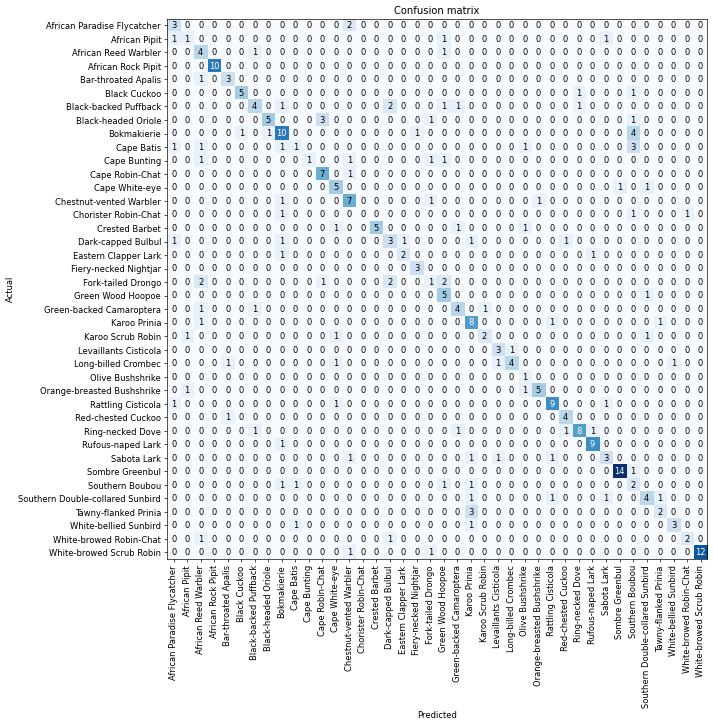

In [37]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
# Add the test data as a test set for the model
src = (ImageList.from_df(path='', df=test, cols='img_path')) # Note test, not sub, as we only have spectrograms for the ims in test
learn.data.add_test(src)

In [39]:
# Get predictions
preds, y = learn.get_preds(DatasetType.Test)

## **Submission**

In [40]:
# Add preds to test
test = test.copy()
for b in birds:
  test[b] = preds[:,learn.data.classes.index(b)]
test.head()

,ID,Ring-necked Dove,Black Cuckoo,Red-chested Cuckoo,Fiery-necked Nightjar,Green Wood Hoopoe,Crested Barbet,Cape Batis,Olive Bushshrike,Orange-breasted Bushshrike,Bokmakierie,Black-backed Puffback,Southern Boubou,Black-headed Oriole,Fork-tailed Drongo,African Paradise Flycatcher,Sabota Lark,Eastern Clapper Lark,Rufous-naped Lark,Dark-capped Bulbul,Sombre Greenbul,Long-billed Crombec,African Reed Warbler,Rattling Cisticola,Levaillants Cisticola,Tawny-flanked Prinia,Karoo Prinia,Bar-throated Apalis,Green-backed Camaroptera,Chestnut-vented Warbler,Cape White-eye,Karoo Scrub Robin,White-browed Scrub Robin,Cape Robin-Chat,White-browed Robin-Chat,Chorister Robin-Chat,Southern Double-collared Sunbird,White-bellied Sunbird,African Pipit,African Rock Pipit,Cape Bunting,file_name,img_path
0,019OYB,0.000711,0.000143,0.000014,0.938387,0.000003,0.000003,0.000514,0.000070,0.000002,0.000058,0.000169,1.695450e-07,0.000001,0.000016,0.003928,0.000001,1.009800e-08,8.570829e-08,0.000444,0.000021,0.053214,2.968448e-07,0.000010,1.507592e-07,0.000037,0.000017,5.559544e-07,0.000005,0.000002,1.403019e-06,0.000011,0.000004,1.093298e-07,0.001877,0.000117,2.987683e-06,0.000215,7.956729e-08,4.572365e-08,4.701014e-07,Test/Test/019OYB.mp3,Test/Test/019OYB.png
1,01S9OX,0.000008,0.000066,0.000048,0.000034,0.000265,0.000011,0.000144,0.000129,0.000119,0.419911,0.001206,4.266509e-04,0.000214,0.004761,0.000265,0.023396,2.205904e-02,2.483936e-04,0.016640,0.001005,0.000052,6.828316e-03,0.000587,1.902890e-04,0.000037,0.000028,8.549959e-04,0.001636,0.298645,2.204619e-04,0.009590,0.044360,1.415386e-01,0.000660,0.001477,1.584647e-04,0.000035,2.948561e-05,8.715170e-05,2.030029e-03,Test/Test/01S9OX.mp3,Test/Test/01S9OX.png
2,02CS12,0.002326,0.000531,0.000809,0.004957,0.013015,0.000594,0.010393,0.012478,0.007038,0.022641,0.005494,5.097177e-02,0.000198,0.005874,0.007316,0.003357,1.967222e-02,1.258897e-03,0.033686,0.001337,0.007617,4.926386e-01,0.005834,4.918978e-03,0.054456,0.142186,4.578959e-03,0.027801,0.003390,1.036266e-03,0.000133,0.010918,9.472549e-04,0.000189,0.000245,2.517783e-02,0.001917,1.118236e-03,5.344408e-03,5.603822e-03,Test/Test/02CS12.mp3,Test/Test/02CS12.png
3,02LM3W,0.000004,0.000039,0.000047,0.000055,0.004043,0.000601,0.009445,0.142229,0.014382,0.745011,0.000353,2.629363e-03,0.000083,0.003616,0.000014,0.000003,4.916008e-03,1.023870e-05,0.000222,0.000003,0.000003,1.483191e-04,0.000748,9.541533e-07,0.000011,0.000380,1.050154e-04,0.000026,0.001030,4.561612e-07,0.000015,0.062013,1.112130e-04,0.004841,0.002579,2.479690e-07,0.000007,6.197834e-06,5.161245e-07,2.668287e-04,Test/Test/02LM3W.mp3,Test/Test/02LM3W.png
4,0C3A2V,0.008340,0.001035,0.023098,0.000751,0.008975,0.000007,0.000167,0.000262,0.000064,0.000106,0.002011,2.523555e-04,0.039277,0.011717,0.623973,0.000053,7.216201e-07,5.004350e-05,0.006738,0.000005,0.005684,1.392941e-04,0.005443,5.367494e-04,0.000106,0.000004,2.882974e-05,0.000115,0.000837,7.003767e-03,0.001161,0.000075,2.482056e-02,0.007091,0.035714,1.761980e-01,0.006861,4.621636e-04,8.130239e-04,2.480602e-05,Test/Test/0C3A2V.mp3,Test/Test/0C3A2V.png


In [41]:
# Merge back into submission DF, adding a low prob prediction for rows where we had no image generated
cols = ['ID']
for b in birds:
  cols.append(b)
ss = pd.merge(sub['ID'], test[cols], on='ID', how='left' )
ss = ss.fillna(1/40) # For those with NaNs (if you only generated spectrograms for a subset of the test mp3s)
ss.head()

,ID,Ring-necked Dove,Black Cuckoo,Red-chested Cuckoo,Fiery-necked Nightjar,Green Wood Hoopoe,Crested Barbet,Cape Batis,Olive Bushshrike,Orange-breasted Bushshrike,Bokmakierie,Black-backed Puffback,Southern Boubou,Black-headed Oriole,Fork-tailed Drongo,African Paradise Flycatcher,Sabota Lark,Eastern Clapper Lark,Rufous-naped Lark,Dark-capped Bulbul,Sombre Greenbul,Long-billed Crombec,African Reed Warbler,Rattling Cisticola,Levaillants Cisticola,Tawny-flanked Prinia,Karoo Prinia,Bar-throated Apalis,Green-backed Camaroptera,Chestnut-vented Warbler,Cape White-eye,Karoo Scrub Robin,White-browed Scrub Robin,Cape Robin-Chat,White-browed Robin-Chat,Chorister Robin-Chat,Southern Double-collared Sunbird,White-bellied Sunbird,African Pipit,African Rock Pipit,Cape Bunting
0,019OYB,0.000711,0.000143,0.000014,0.938387,0.000003,0.000003,0.000514,0.000070,0.000002,0.000058,0.000169,1.695450e-07,0.000001,0.000016,0.003928,0.000001,1.009800e-08,8.570829e-08,0.000444,0.000021,0.053214,2.968448e-07,0.000010,1.507592e-07,0.000037,0.000017,5.559544e-07,0.000005,0.000002,1.403019e-06,0.000011,0.000004,1.093298e-07,0.001877,0.000117,2.987683e-06,0.000215,7.956729e-08,4.572365e-08,4.701014e-07
1,01S9OX,0.000008,0.000066,0.000048,0.000034,0.000265,0.000011,0.000144,0.000129,0.000119,0.419911,0.001206,4.266509e-04,0.000214,0.004761,0.000265,0.023396,2.205904e-02,2.483936e-04,0.016640,0.001005,0.000052,6.828316e-03,0.000587,1.902890e-04,0.000037,0.000028,8.549959e-04,0.001636,0.298645,2.204619e-04,0.009590,0.044360,1.415386e-01,0.000660,0.001477,1.584647e-04,0.000035,2.948561e-05,8.715170e-05,2.030029e-03
2,02CS12,0.002326,0.000531,0.000809,0.004957,0.013015,0.000594,0.010393,0.012478,0.007038,0.022641,0.005494,5.097177e-02,0.000198,0.005874,0.007316,0.003357,1.967222e-02,1.258897e-03,0.033686,0.001337,0.007617,4.926386e-01,0.005834,4.918978e-03,0.054456,0.142186,4.578959e-03,0.027801,0.003390,1.036266e-03,0.000133,0.010918,9.472549e-04,0.000189,0.000245,2.517783e-02,0.001917,1.118236e-03,5.344408e-03,5.603822e-03
3,02LM3W,0.000004,0.000039,0.000047,0.000055,0.004043,0.000601,0.009445,0.142229,0.014382,0.745011,0.000353,2.629363e-03,0.000083,0.003616,0.000014,0.000003,4.916008e-03,1.023870e-05,0.000222,0.000003,0.000003,1.483191e-04,0.000748,9.541533e-07,0.000011,0.000380,1.050154e-04,0.000026,0.001030,4.561612e-07,0.000015,0.062013,1.112130e-04,0.004841,0.002579,2.479690e-07,0.000007,6.197834e-06,5.161245e-07,2.668287e-04
4,0C3A2V,0.008340,0.001035,0.023098,0.000751,0.008975,0.000007,0.000167,0.000262,0.000064,0.000106,0.002011,2.523555e-04,0.039277,0.011717,0.623973,0.000053,7.216201e-07,5.004350e-05,0.006738,0.000005,0.005684,1.392941e-04,0.005443,5.367494e-04,0.000106,0.000004,2.882974e-05,0.000115,0.000837,7.003767e-03,0.001161,0.000075,2.482056e-02,0.007091,0.035714,1.761980e-01,0.006861,4.621636e-04,8.130239e-04,2.480602e-05


In [42]:
# Check shape
ss.shape

(911, 41)

In [0]:
# Save 
ss.to_csv('submission1.csv', index=False)